In [1]:
# Load some test data
import pandas as pd

# This dataset contains the petal width and length, and sepal width and length for
# a bunch of iris flowers.
#
# Three different species are represented
iris = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/iris.csv')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Here are the measurements for some flowers we want to classify
mystery_flowers = pd.DataFrame({"petal_width": [0.5, 1.5, 1.6], "petal_length": [1.8, 3.4, 5.0]})
mystery_flowers.head()

,petal_width,petal_length
0,0.5,1.8
1,1.5,3.4
2,1.6,5.0


In [3]:
import altair as alt

# Plot the different species by petal length and width
known = alt.Chart(iris).mark_point(filled=True).encode(
    x='petal_width',
    y='petal_length',
    color=alt.Color('species', scale=alt.Scale(scheme='set1'))
)
known

alt.Chart(...)

In [4]:
# Let's add the locations of the mystery flowers
# Plot the different species by petal length and width
unknown = alt.Chart(mystery_flowers).mark_point(color='#000000', shape='triangle').encode(
    x='petal_width',
    y='petal_length'
)

# The three black triangles below are the unknown flowers for which we want to use kNN
# to predict their species
known + unknown

alt.LayerChart(...)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Let's build a nearest neighbor classifier with k set to 3
X = iris[ ['petal_width', 'petal_length'] ]
y = iris['species']

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X, y)

# Predict the species for our three mystery flowers
clf.predict(mystery_flowers)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [6]:
# What's the probability of those predictions?

# Notice that the 3 mystery flower, which is hovering between the clumps of 
# Iris-versicolor and Iris-virginica samples, is less certain than the other two
clf.predict_proba(mystery_flowers)

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333]])

In [7]:
# Let's test how well our classifier does in general
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix

# Let's get the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[12,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 21]])

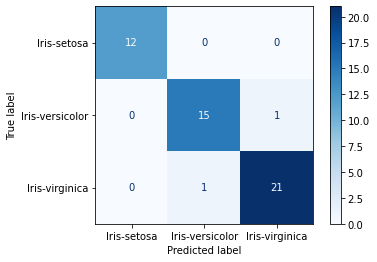

In [9]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Let's plot the confusion matrix
plt.rcParams['figure.facecolor'] = 'white'
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  